In [1]:
#Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

C:\Users\Public\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [45]:
#Setting seed
np.random.seed(41)
tf.set_random_seed(41)
sess = tf.Session()


In [56]:
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data]) # Extracting the array values from Iris dataset and storing the independent variables
y_vals = np.array([1 if y == 0 else -1 for y in iris.target]) #Extracting the target variable

In [57]:
train_indices = np.random.choice(len(x_vals),
                                 round(len(x_vals)*0.8), #Storing random indices in order to separate train and test set
                                 replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices] # Separating the data to Train and Test sets
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices] 
y_vals_test = y_vals[test_indices]

In [58]:
# Declare batch size
batch_size = 110 # Mini-Batch Gradient Descent 

# Initialize placeholders - Placeholders help in creating variables which are not provided with any data, but will be useful later
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32) 
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for SVM
A = tf.Variable(tf.random_normal(shape=[2, 1])) # The initial set of coefficients for the variables
b = tf.Variable(tf.random_normal(shape=[1, 1])) # The amount of offset or the bias from the original data

In [59]:
# Declare model operations
model_output = tf.subtract(tf.matmul(x_data, A), b) # Implements the prediction - ((W(transpose) * X) - b)

# Declare vector L2 'norm' function squared
l2_norm = tf.reduce_sum(tf.square(A)) # Regularization parameter inorder to avoid overfitting and bring better generalizability

In [60]:
# Declare loss function
# Loss = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
# L2 regularization parameter, alpha

alpha = tf.constant([0.01]) #The tolerance or the alowance of misclassified values. If alpha = 0, there is no tolerance

# Margin term in loss - Implements the loss function = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target)))) 
# Put terms together
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [61]:
# Declare prediction function
prediction = tf.sign(model_output) # It returns an indication of sign of a number - Element wise
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32)) # Produces the mean value after the target values 
# are compared with the predicted values

# Declare optimizer
my_opt = tf.train.AdamOptimizer(0.005) # Adaptive Moment Estimation algorithm - Gradient Descent to reduce the values of the coefficients
train_step = my_opt.minimize(loss) # Optimization or Minimazation function that minimizes the loss and reduces the cost

# Initialize variables
init = tf.global_variables_initializer() # Initializes the vaiables - Very important step
sess.run(init) # Runs the session 

In [62]:
# Training loop
loss_vec = []
train_accuracy = [] 
test_accuracy = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size) # Separating the dataset into bathces in order to implement Batch Gradient Descent
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    # loss function is computed by running the session on "loss" that was declared earlier
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y}) # rand_x is fed on place of x_data and rand_y for y_target
    loss_vec.append(temp_loss) # Appends the loss for each batch of BGD

    train_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_vals_train,
        y_target: np.transpose([y_vals_train])})
    train_accuracy.append(train_acc_temp) # Appends the training accuracy of each batch of BGD

    test_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_vals_test,
        y_target: np.transpose([y_vals_test])})
    test_accuracy.append(test_acc_temp) # Appends the test accuracy of each batch of BGD

    if (i + 1) % 75 == 0:
        print('Step #{} A = {}, b = {}'.format(
            str(i+1),
            str(sess.run(A)),
            str(sess.run(b))
        ))
        print('Loss = ' + str(temp_loss))

Step #75 A = [[0.13531697]
 [0.8064066 ]], b = [[0.09785528]]
Loss = [2.060217]
Step #150 A = [[-0.14035128]
 [ 0.44288617]], b = [[0.33822095]]
Loss = [1.0131652]
Step #225 A = [[-0.17844929]
 [ 0.23824783]], b = [[0.32011265]]
Loss = [0.6558905]
Step #300 A = [[-0.14625984]
 [ 0.06868119]], b = [[0.23011461]]
Loss = [0.7015987]
Step #375 A = [[-0.11762729]
 [-0.08754724]], b = [[0.14673169]]
Loss = [0.49682152]
Step #450 A = [[-0.0880899 ]
 [-0.24043253]], b = [[0.05219244]]
Loss = [0.5527898]
Step #525 A = [[-0.06790142]
 [-0.4035496 ]], b = [[-0.0438533]]
Loss = [0.54290444]
Step #600 A = [[-0.04586967]
 [-0.57375056]], b = [[-0.1495468]]
Loss = [0.4464184]
Step #675 A = [[-0.02145647]
 [-0.7507436 ]], b = [[-0.26206186]]
Loss = [0.43518373]
Step #750 A = [[ 0.0056322 ]
 [-0.92811525]], b = [[-0.38092154]]
Loss = [0.36069432]
Step #825 A = [[ 0.02833769]
 [-1.1166795 ]], b = [[-0.5033289]]
Loss = [0.34057224]
Step #900 A = [[ 0.05031093]
 [-1.317426  ]], b = [[-0.6328629]]
Loss = [

In [63]:
# Extract coefficients
[[a1], [a2]] = sess.run(A) # Extracting the calculated coefficients of A or W
[[b]] = sess.run(b) # Extracting the coefficient of the bias
slope = -a2/a1 # Calculating the slope for the linear equation
y_intercept = b/a1 # Calculating the intercept term for the linear equation

# Extract x1 and x2 vals
x1_vals = [d[1] for d in x_vals]
print(x1_vals)

# Get best fit line
best_fit = []
for i in x1_vals:
    best_fit.append(slope*i+y_intercept) # calculating the array of values for the linear equation y = mx + c

# Separate I. setosa
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1] # Classsifying the values according to their nature - Setosa or Not
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
not_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
not_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]

[0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 1.0, 1.5, 1.0, 1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.0, 1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8]


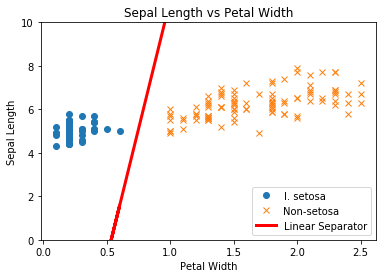

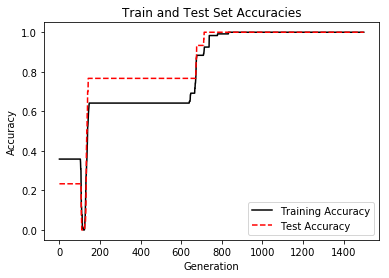

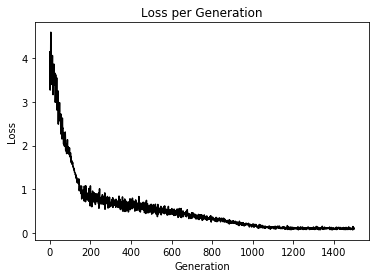

In [64]:
%matplotlib inline
# Plot data and line
plt.plot(setosa_x, setosa_y, 'o', label='I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot train/test accuracies
plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

### SVM Regression

In [12]:
# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# Split data into train/test sets
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False) #Storing random indices in order to separate train and test set
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [13]:
# Declare batch size
batch_size = 50

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [14]:
# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

In [15]:
# Declare loss function
# = max(0, abs(target - predicted) + epsilon)
# 1/2 margin width parameter = epsilon
epsilon = tf.constant([0.5]) # Hinge loss parameter - Slack variable which ignores errors which are situated within the certain distance of the true value
# Epsilon intensive function
# Margin term in loss
loss = tf.reduce_mean(tf.maximum(0., tf.subtract(tf.abs(tf.subtract(model_output, y_target)), epsilon)))

In [16]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.075) # Normal Gradient Descent Optimizer
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [17]:
# Training loop
train_loss = []
test_loss = []
for i in range(200):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_train_loss = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
    train_loss.append(temp_train_loss)
    
    temp_test_loss = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
    test_loss.append(temp_test_loss)
    if (i+1)%50==0:
        print('-----------')
        print('Generation: ' + str(i+1))
        print('A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Train Loss = ' + str(temp_train_loss))
        print('Test Loss = ' + str(temp_test_loss))
        

-----------
Generation: 50
A = [[2.4992237]] b = [[2.3145027]]
Train Loss = 0.7786386
Test Loss = 0.5635377
-----------
Generation: 100
A = [[1.895174]] b = [[3.4260025]]
Train Loss = 0.35723191
Test Loss = 0.34500885
-----------
Generation: 150
A = [[1.3851737]] b = [[4.1730022]]
Train Loss = 0.13055246
Test Loss = 0.15193897
-----------
Generation: 200
A = [[1.1531234]] b = [[4.4850025]]
Train Loss = 0.08828888
Test Loss = 0.10670812


In [18]:
# Extract Coefficients
[[slope]] = sess.run(A)
[[y_intercept]] = sess.run(b)
[width] = sess.run(epsilon)

# Get best fit line
best_fit = []
best_fit_upper = []
best_fit_lower = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept) # Fitting the values within the margin
    best_fit_upper.append(slope*i+y_intercept+width) # Forming the upper bound
    best_fit_lower.append(slope*i+y_intercept-width) # Forming the lower bound


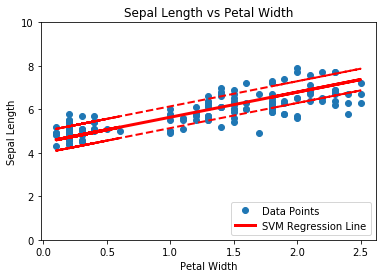

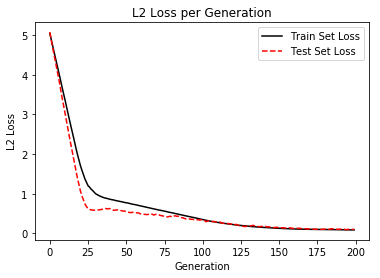

In [19]:
# Plot fit with data
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='SVM Regression Line', linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=2)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=2)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(train_loss, 'k-', label='Train Set Loss')
plt.plot(test_loss, 'r--', label='Test Set Loss')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.legend(loc='upper right')
plt.show()

### Nonlinear SVM Example

In [20]:
# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y==0 else -1 for y in iris.target])
class1_x = [x[0] for i,x in enumerate(x_vals) if y_vals[i]==1]
class1_y = [x[1] for i,x in enumerate(x_vals) if y_vals[i]==1]
class2_x = [x[0] for i,x in enumerate(x_vals) if y_vals[i]==-1]
class2_y = [x[1] for i,x in enumerate(x_vals) if y_vals[i]==-1]

In [21]:
# Declare batch size
batch_size = 150

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype=tf.float32)

# Create variables for svm
b = tf.Variable(tf.random_normal(shape=[1,batch_size]))

In [22]:
# Gaussian (RBF) kernel - Defines the Kernel function - If data points occur as pairwise dot products , they can be replaced by a kernel
#It calculates the Euclidean Norm for the two data points and the function can be applied only to vectors, mapped to infinite D space
gamma = tf.constant(-50.0)
sq_vec = tf.multiply(2., tf.matmul(x_data, tf.transpose(x_data))) 
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_vec)))

In [23]:
# Compute SVM Model - Creates a Kernel Support Vector Machine and every dot product is replaced by the kernel defined above

first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_term = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vec_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_term, second_term))

In [24]:
# Gaussian (RBF) prediction kernel 
#SVMs don't give us weights , instead they give alpha or support vectors.  
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1),[-1,1])
pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2., tf.matmul(x_data, tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist))) # Prediction kernel after substituting in the kernel formula mentioned above

prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target),b), pred_kernel)
prediction = tf.sign(prediction_output-tf.reduce_mean(prediction_output))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))

In [25]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [26]:
# Training loop
loss_vec = []
batch_accuracy = []
for i in range(300):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x,
                                             y_target: rand_y,
                                             prediction_grid:rand_x})
    batch_accuracy.append(acc_temp)
    
    if (i+1)%75==0:
        print('Step #' + str(i+1))
        print('Loss = ' + str(temp_loss))
        print('Accuracy = ' + str(acc_temp))
        #print(batch_accuracy)

Step #75
Loss = -96.35263
Accuracy = 0.9533333
Step #150
Loss = -208.85255
Accuracy = 1.0
Step #225
Loss = -321.35248
Accuracy = 1.0
Step #300
Loss = -433.85257
Accuracy = 0.97333336


In [27]:
# Create a mesh to plot points in
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]
[grid_predictions] = sess.run(prediction, feed_dict={x_data: x_vals,
                                                   y_target: np.transpose([y_vals]),
                                                   prediction_grid: grid_points})
grid_predictions = grid_predictions.reshape(xx.shape)

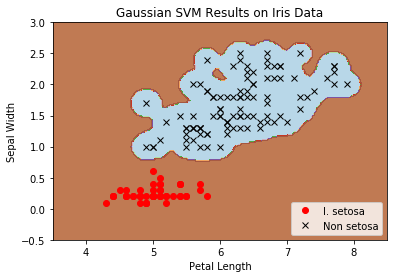

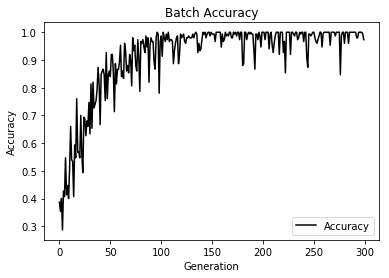

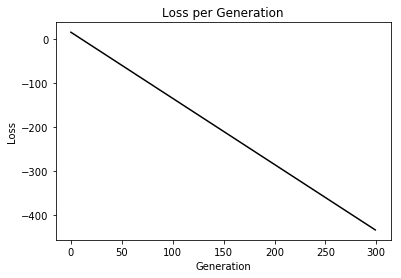

In [28]:
%matplotlib inline
# Plot points and grid
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.8)
plt.plot(class1_x, class1_y, 'ro', label='I. setosa')
plt.plot(class2_x, class2_y, 'kx', label='Non setosa')
plt.title('Gaussian SVM Results on Iris Data')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='lower right')
plt.ylim([-0.5, 3.0])
plt.xlim([3.5, 8.5])
plt.show()

# Plot batch accuracy
plt.plot(batch_accuracy, 'k-', label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

#### Evaluate Test Points

In [29]:
x_test_seq = np.array([4., 5., 6., 7.])
y_test_seq = np.array([0., 1., 2.])

x_test, y_test = np.meshgrid(x_test_seq,y_test_seq)
test_points = np.c_[x_test.ravel(), y_test.ravel()]

In [30]:
[test_predictions] = sess.run(prediction, feed_dict={x_data: x_vals,
                                                     y_target: np.transpose([y_vals]),
                                                     prediction_grid: test_points})

In [31]:
test_predictions.ravel()

array([ 1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.],
      dtype=float32)

In [32]:
for ix, point in enumerate(test_points):
    point_pred = test_predictions.ravel()[ix]
    print('Point {} is predicted to be in class {}'.format(point, point_pred))

Point [4. 0.] is predicted to be in class 1.0
Point [5. 0.] is predicted to be in class 1.0
Point [6. 0.] is predicted to be in class 1.0
Point [7. 0.] is predicted to be in class 1.0
Point [4. 1.] is predicted to be in class 1.0
Point [5. 1.] is predicted to be in class -1.0
Point [6. 1.] is predicted to be in class -1.0
Point [7. 1.] is predicted to be in class 1.0
Point [4. 2.] is predicted to be in class 1.0
Point [5. 2.] is predicted to be in class 1.0
Point [6. 2.] is predicted to be in class -1.0
Point [7. 2.] is predicted to be in class -1.0


### Multi-class (Nonlinear) SVM Example


In [33]:
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals1 = np.array([1 if y==0 else -1 for y in iris.target])
y_vals2 = np.array([1 if y==1 else -1 for y in iris.target])
y_vals3 = np.array([1 if y==2 else -1 for y in iris.target])
y_vals = np.array([y_vals1, y_vals2, y_vals3])
class1_x = [x[0] for i,x in enumerate(x_vals) if iris.target[i]==0]
class1_y = [x[1] for i,x in enumerate(x_vals) if iris.target[i]==0]
class2_x = [x[0] for i,x in enumerate(x_vals) if iris.target[i]==1]
class2_y = [x[1] for i,x in enumerate(x_vals) if iris.target[i]==1]
class3_x = [x[0] for i,x in enumerate(x_vals) if iris.target[i]==2]
class3_y = [x[1] for i,x in enumerate(x_vals) if iris.target[i]==2]

In [34]:
batch_size = 50

In [35]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[3, None], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype=tf.float32)

# Create variables for svm
b = tf.Variable(tf.random_normal(shape=[3,batch_size]))

In [36]:
# Gaussian (RBF) kernel - Defines the Kernel function - If data points occur as pairwise dot products , they can be replaced by a kernel
#It calculates the Euclidean Norm for the two data points and the function can be applied only to vectors
gamma = tf.constant(-10.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])
sq_dists = tf.multiply(2., tf.matmul(x_data, tf.transpose(x_data)))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_dists)))

In [37]:
# Declare function to do reshape/batch multiplication
def reshape_matmul(mat, _size):
    v1 = tf.expand_dims(mat, 1)
    v2 = tf.reshape(v1, [3, _size, 1])
    return(tf.matmul(v2, v1))

In [38]:
# Compute SVM Model - Creates a Kernel Support Vector Machine and every dot product is replaced by the kernel defined above
first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = reshape_matmul(y_target, batch_size)

second_term = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vec_cross, y_target_cross)),[1,2])
loss = tf.reduce_sum(tf.negative(tf.subtract(first_term, second_term)))


In [39]:
# Gaussian (RBF) prediction kernel 
#SVMs don't give us weights , instead they give alpha or support vectors.
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1),[-1,1])
pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2., tf.matmul(x_data, tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

prediction_output = tf.matmul(tf.multiply(y_target,b), pred_kernel)
prediction = tf.argmax(prediction_output-tf.expand_dims(tf.reduce_mean(prediction_output,1), 1), 0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, tf.argmax(y_target,0)), tf.float32))

In [40]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [41]:
# Training loop
loss_vec = []
batch_accuracy = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = y_vals[:,rand_index]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x,
                                             y_target: rand_y,
                                             prediction_grid:rand_x})
    batch_accuracy.append(acc_temp)
    
    if (i+1)%25==0:
        print('Step #' + str(i+1))
        print('Loss = ' + str(temp_loss))
        print('Accuracy = ' + str(acc_temp))

Step #25
Loss = -334.23145
Accuracy = 0.8
Step #50
Loss = -671.7312
Accuracy = 0.98
Step #75
Loss = -1009.231
Accuracy = 0.96
Step #100
Loss = -1346.731
Accuracy = 0.9


In [42]:
# Create a mesh to plot points in
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = sess.run(prediction, feed_dict={x_data: rand_x,
                                                   y_target: rand_y,
                                                   prediction_grid: grid_points})
grid_predictions = grid_predictions.reshape(xx.shape)

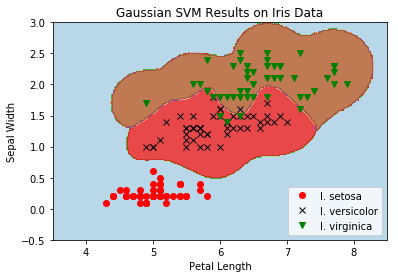

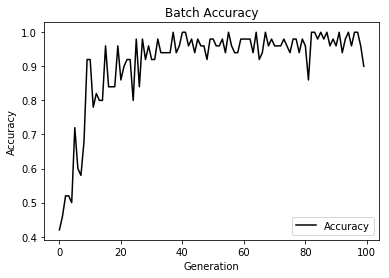

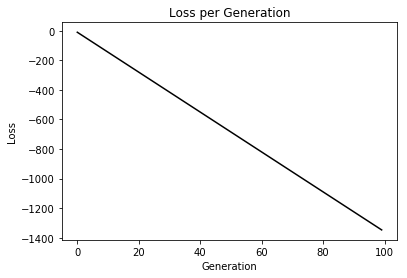

In [43]:
# Plot points and grid
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.8)
plt.plot(class1_x, class1_y, 'ro', label='I. setosa')
plt.plot(class2_x, class2_y, 'kx', label='I. versicolor')
plt.plot(class3_x, class3_y, 'gv', label='I. virginica')
plt.title('Gaussian SVM Results on Iris Data')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='lower right')
plt.ylim([-0.5, 3.0])
plt.xlim([3.5, 8.5])
plt.show()

# Plot batch accuracy
plt.plot(batch_accuracy, 'k-', label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()